<a href="https://colab.research.google.com/github/Edrien-Manzanero/DogvsCat/blob/main/ML_Test11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import matplotlib.pyplot as plt
import kagglehub
import os
import numpy as np

from PIL import ImageOps
from PIL import Image

from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

In [2]:
path = kagglehub.dataset_download("tongpython/cat-and-dog")

In [3]:
train_set_path = os.path.join(path, "training_set", "training_set")

test_set_path = os.path.join(path, "test_set", "test_set")

In [4]:
batchsize = 2

transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

training_data = datasets.ImageFolder(root=train_set_path, transform=transform)
test_data = datasets.ImageFolder(root=test_set_path, transform=transform)

train_dataloader = DataLoader(training_data, batchsize, shuffle=True )
test_dataloader = DataLoader(test_data, 64, shuffle=True )

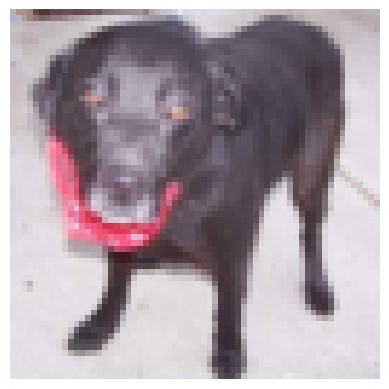

In [5]:
images, labels = next(iter(train_dataloader))
img = images[1]
img = img.permute(1, 2, 0)

plt.imshow(img)
plt.axis('off')
plt.show()

In [6]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv_relu_stack = nn.Sequential(
          nn.Conv2d(3, 64, kernel_size=3, padding=1),
          nn.ReLU(),
          nn.MaxPool2d(2),







    )
    self.flatten = nn.Flatten()
    # Assuming the output of the last MaxPool2d is 32 channels and a spatial size of 7x7 (from 28x28 input / 2 / 2)
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(64 * 32 * 32, 128),
        nn.ReLU(),
        nn.Linear(128, 1) # Output layer for 2 classes (cat and dog)
    )


  def forward(self, x):
    x = self.conv_relu_stack(x)
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits

In [7]:
model = NeuralNetwork()

In [8]:
learning_rate = 0.001
epochs = 20

In [9]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [10]:
def train_loop(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)

  model.train()
  for batch, (X,y) in enumerate(dataloader):

    pred = model(X)
    loss = loss_fn(pred,y.unsqueeze(1).float())

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if batch % 10 == 0:
      loss, current = loss.item(), batch * batchsize + len(X)
      print(f"loss: {loss} current: {current} size: {size}")


def test_loop(dataloader, model, loss_fn):
  model.eval()
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss, correct = 0,0

  with torch.no_grad():
    for X, y in dataloader:
      pred = model(X)
      test_loss += loss_fn(pred, y.unsqueeze(1).float()).item()
      predicted = torch.sigmoid(pred) > 0.5
      correct += (predicted.squeeze() == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test error: Accuracy: {100 * correct:.2f}%  avg loss: {test_loss:.4f}")

In [12]:
for t in range(epochs):
  print(f"{t+1}/n----------------------------------")
  train_loop(train_dataloader, model, loss_fn, optimizer)
  test_loop(test_dataloader,model, loss_fn)

Streaming output truncated to the last 5000 lines.
loss: 0.038303375244140625 current: 4762 size: 8005
loss: 0.8399574756622314 current: 4782 size: 8005
loss: 0.3605891168117523 current: 4802 size: 8005
loss: 0.06635262072086334 current: 4822 size: 8005
loss: 0.37586498260498047 current: 4842 size: 8005
loss: 0.11549486219882965 current: 4862 size: 8005
loss: 0.183862566947937 current: 4882 size: 8005
loss: 0.13453087210655212 current: 4902 size: 8005
loss: 0.035147666931152344 current: 4922 size: 8005
loss: 0.20361784100532532 current: 4942 size: 8005
loss: 0.06323044002056122 current: 4962 size: 8005
loss: 0.17847591638565063 current: 4982 size: 8005
loss: 0.12845516204833984 current: 5002 size: 8005
loss: 0.03002958372235298 current: 5022 size: 8005
loss: 1.0395234823226929 current: 5042 size: 8005
loss: 0.37011516094207764 current: 5062 size: 8005
loss: 0.9529969096183777 current: 5082 size: 8005
loss: 0.150623619556427 current: 5102 size: 8005
loss: 0.1469525396823883 current: 512